In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima

import patsy                           # provides a syntax for specifying models  
import statsmodels.api as sm           # provides statistical models like ols, gmm, anova, etc...; 
                                       # for Cross-sectional models and methods.
import statsmodels.formula.api as smf  # provides a way to directly spec models from formulas

In [2]:
df = pd.read_csv("Walworth_County_ACS_Data_2014-2020_Group_1.csv")

In [3]:
df.head()

,Municipality,Year,No health insurance coverage,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999",Unemployed,No vehicles available,Less than 9th grade,"9th to 12th grade, no diploma",Child,Foreign born,"Speak English less than ""very well""",With a broadband Internet subscription,Average family size,Median age (years)
0,Bloomfield town,2020,0.13,0.08,0.03,0.12,0.04,0.01,0.09,0.06,0.32,0.11,0.07,0.80,3.08,34.9
1,Bloomfield village,2020,0.07,0.03,0.07,0.09,0.04,0.02,0.01,0.14,0.39,0.03,0.02,0.81,3.18,35.9
2,Burlington city,2020,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
3,Darien town,2020,0.12,0.02,0.02,0.13,0.01,0.02,0.05,0.10,0.35,0.08,0.10,0.85,3.28,43.7
4,Darien village,2020,0.07,0.02,0.02,0.04,0.05,0.00,0.00,0.07,0.31,0.05,0.02,0.85,3.06,36.7


In [4]:
df.columns

Index(['Municipality', 'Year', 'No health insurance coverage',
       'Less than $10,000', '$10,000 to $14,999', '$15,000 to $24,999',
       'Unemployed', 'No vehicles available', 'Less than 9th grade',
       '9th to 12th grade, no diploma', 'Child', 'Foreign born',
       'Speak English less than "very well"',
       'With a broadband Internet subscription', 'Average family size',
       'Median age (years)'],
      dtype='object')

In [5]:
df1=df.fillna(0)

In [6]:
df1['Less than $25,000'] = df1['Less than $10,000'] + df1['$10,000 to $14,999'] + df1['$15,000 to $24,999']
df1['Less than 12th grade'] = df1['Less than 9th grade'] + df1['9th to 12th grade, no diploma']
df1['Without a broadband Internet subscription'] = 1-df1['With a broadband Internet subscription']

In [7]:
df1.head()

,Municipality,Year,No health insurance coverage,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999",Unemployed,No vehicles available,Less than 9th grade,"9th to 12th grade, no diploma",Child,Foreign born,"Speak English less than ""very well""",With a broadband Internet subscription,Average family size,Median age (years),"Less than $25,000",Less than 12th grade,Without a broadband Internet subscription
0,Bloomfield town,2020,0.13,0.08,0.03,0.12,0.04,0.01,0.09,0.06,0.32,0.11,0.07,0.80,3.08,34.9,0.23,0.15,0.20
1,Bloomfield village,2020,0.07,0.03,0.07,0.09,0.04,0.02,0.01,0.14,0.39,0.03,0.02,0.81,3.18,35.9,0.19,0.15,0.19
2,Burlington city,2020,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00
3,Darien town,2020,0.12,0.02,0.02,0.13,0.01,0.02,0.05,0.10,0.35,0.08,0.10,0.85,3.28,43.7,0.17,0.15,0.15
4,Darien village,2020,0.07,0.02,0.02,0.04,0.05,0.00,0.00,0.07,0.31,0.05,0.02,0.85,3.06,36.7,0.08,0.07,0.15


In [8]:
df2 = df1.drop(['Less than $10,000','$10,000 to $14,999', '$15,000 to $24,999','Less than 9th grade',
                '9th to 12th grade, no diploma','Average family size',
               'With a broadband Internet subscription'], axis=1)

In [9]:
df2.columns

Index(['Municipality', 'Year', 'No health insurance coverage', 'Unemployed',
       'No vehicles available', 'Child', 'Foreign born',
       'Speak English less than "very well"', 'Median age (years)',
       'Less than $25,000', 'Less than 12th grade',
       'Without a broadband Internet subscription'],
      dtype='object')

In [10]:
correlation = df2.corr()

In [11]:
correlation.style.background_gradient(cmap='coolwarm')

,Year,No health insurance coverage,Unemployed,No vehicles available,Child,Foreign born,"Speak English less than ""very well""",Median age (years),"Less than $25,000",Less than 12th grade,Without a broadband Internet subscription
Year,1.000000,-0.274680,-0.463730,-0.053434,-0.002857,0.013249,-0.015935,0.086371,-0.186649,-0.040249,-0.841167
No health insurance coverage,-0.274680,1.000000,0.528081,0.263540,0.327079,0.664888,0.688000,0.000814,0.448911,0.604593,0.180002
Unemployed,-0.463730,0.528081,1.000000,0.264710,0.369107,0.357425,0.329960,0.001451,0.547466,0.440963,0.381726
No vehicles available,-0.053434,0.263540,0.264710,1.000000,0.119263,0.437758,0.380983,-0.028414,0.701035,0.407288,0.039811
Child,-0.002857,0.327079,0.369107,0.119263,1.000000,0.302403,0.304259,0.339983,0.264879,0.485126,-0.119256
Foreign born,0.013249,0.664888,0.357425,0.437758,0.302403,1.000000,0.928894,0.013964,0.500403,0.740526,-0.043914
"Speak English less than ""very well""",-0.015935,0.688000,0.329960,0.380983,0.304259,0.928894,1.000000,-0.080954,0.419429,0.792989,-0.006242
Median age (years),0.086371,0.000814,0.001451,-0.028414,0.339983,0.013964,-0.080954,1.000000,-0.078277,0.008198,-0.189851
"Less than $25,000",-0.186649,0.448911,0.547466,0.701035,0.264879,0.500403,0.419429,-0.078277,1.000000,0.490794,0.150570
Less than 12th grade,-0.040249,0.604593,0.440963,0.407288,0.485126,0.740526,0.792989,0.008198,0.490794,1.000000,0.003391


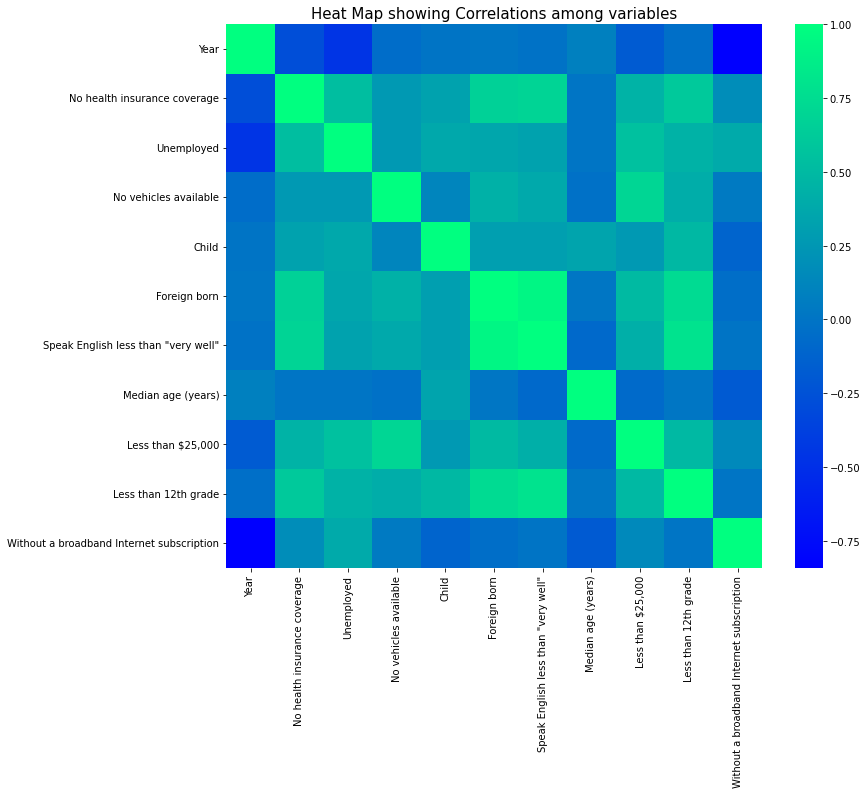

In [12]:
plt.figure(figsize = (12,10))
sns.heatmap(correlation, cmap = 'winter')
plt.title('Heat Map showing Correlations among variables', size = 15)
plt.savefig("heatmap.png")
plt.show()

<Figure size 259200x311040 with 0 Axes>

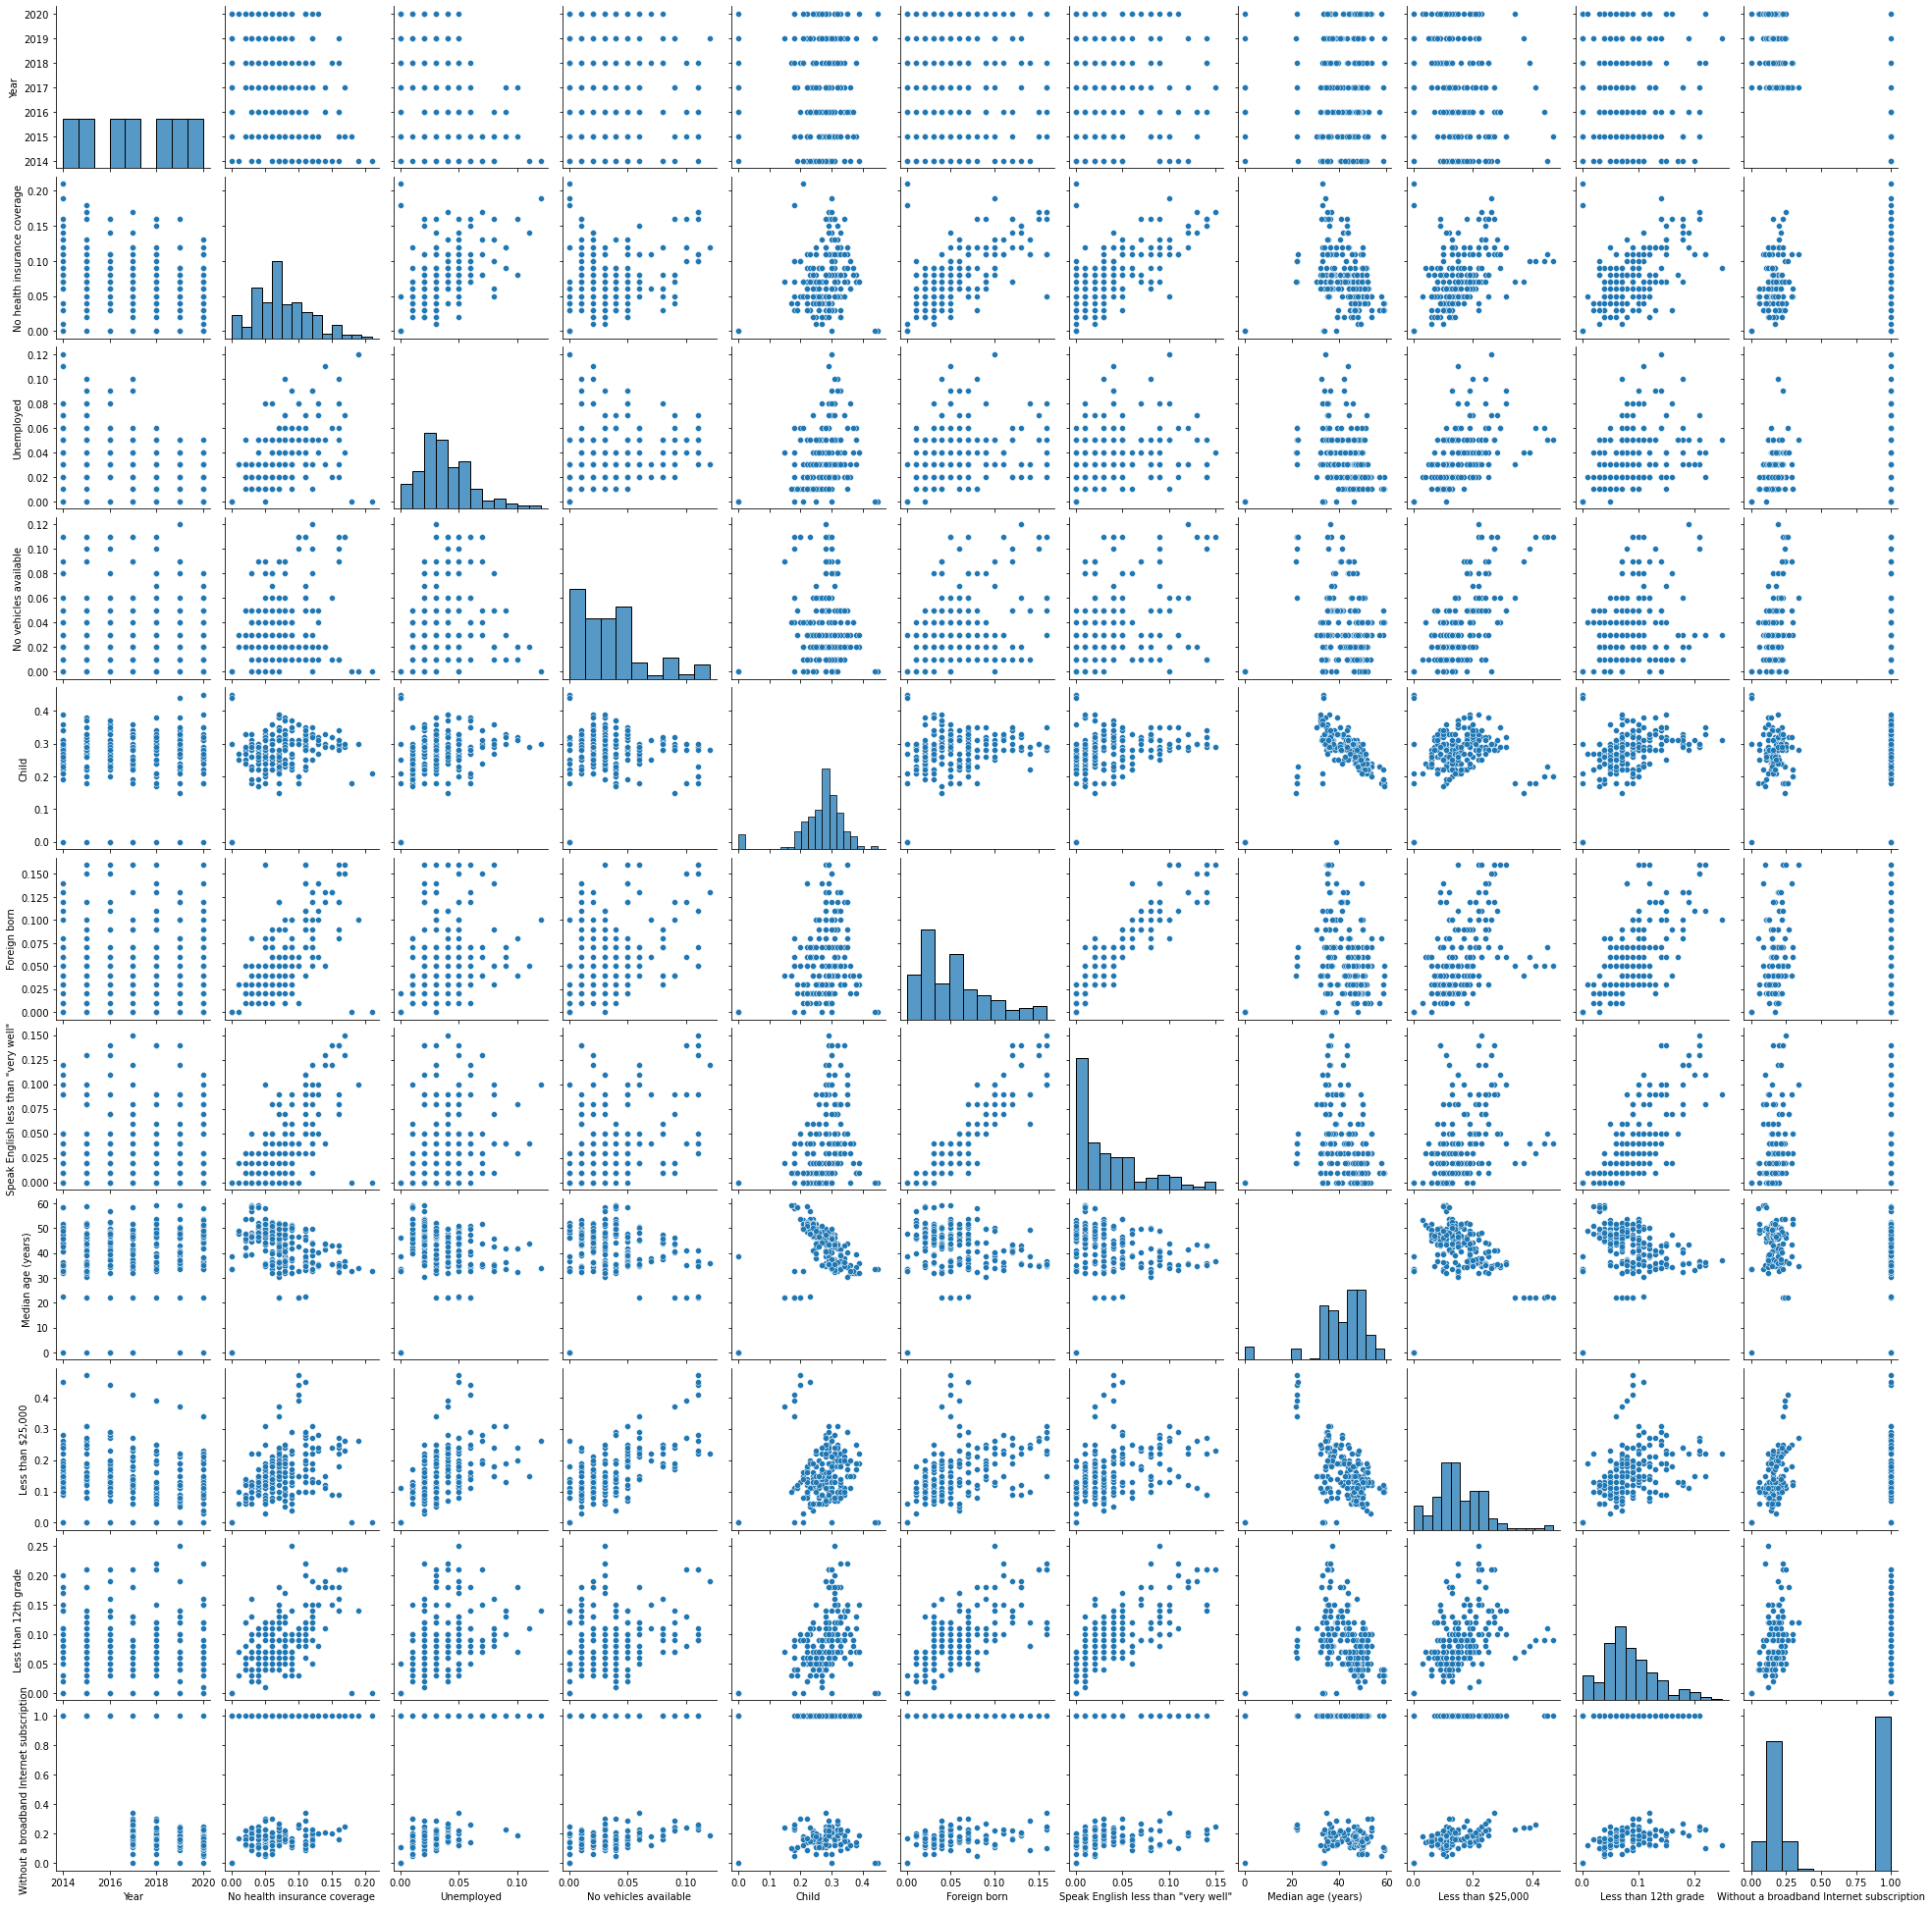

In [13]:
plt.figure(figsize = (3600,4320))
sns.pairplot(df2)

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'No health insurance coverage'}>,
        <AxesSubplot:title={'center':'Unemployed'}>],
       [<AxesSubplot:title={'center':'No vehicles available'}>,
        <AxesSubplot:title={'center':'Child'}>,
        <AxesSubplot:title={'center':'Foreign born'}>],
       [<AxesSubplot:title={'center':'Speak English less than "very well"'}>,
        <AxesSubplot:title={'center':'Median age (years)'}>,
        <AxesSubplot:title={'center':'Less than $25,000'}>],
       [<AxesSubplot:title={'center':'Less than 12th grade'}>,
        <AxesSubplot:title={'center':'Without a broadband Internet subscription'}>,
        <AxesSubplot:>]], dtype=object)

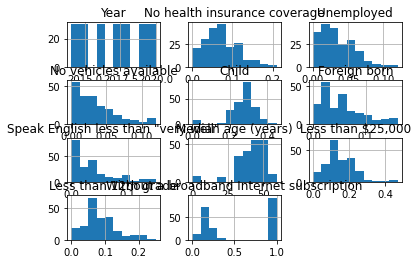

In [14]:
df2.hist()

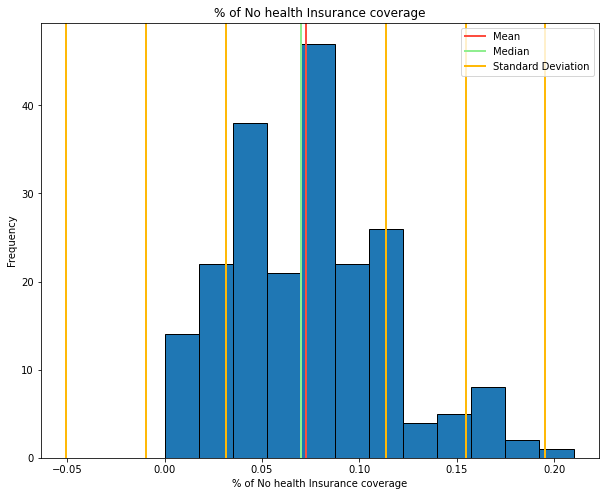

In [15]:
mean = np.mean(df2["No health insurance coverage"])
median = np.median(df2["No health insurance coverage"])
std = np.std(df2["No health insurance coverage"])

plt.figure(figsize = (10,8))
plt.hist(df2["No health insurance coverage"], bins=12, edgecolor='black')

plt.title("% of No health Insurance coverage")
plt.xlabel("% of No health Insurance coverage")
plt.ylabel("Frequency")

plt.axvline(x = mean, color="#FD4E40", linestyle = "solid", linewidth=2, label="Mean")
plt.axvline(x = median, color="#90ee90", linestyle="solid", linewidth=2,label="Median")

plt.axvline(x = mean+std, color="#FFB908", linestyle = "solid", linewidth=2, label="Standard Deviation")
plt.axvline(x = mean-std, color="#FFB908", linestyle = "solid", linewidth=2)

plt.axvline(x = mean+std*2, color="#FFB908", linestyle = "solid", linewidth=2)
plt.axvline(x = mean-std*2, color="#FFB908", linestyle = "solid", linewidth=2)

plt.axvline(x = mean+std*3, color="#FFB908", linestyle = "solid", linewidth=2)
plt.axvline(x = mean-std*3, color="#FFB908", linestyle = "solid", linewidth=2)

plt.legend(loc=1)
plt.savefig("% of No health Insurance coverage Distribution.png")
plt.show()

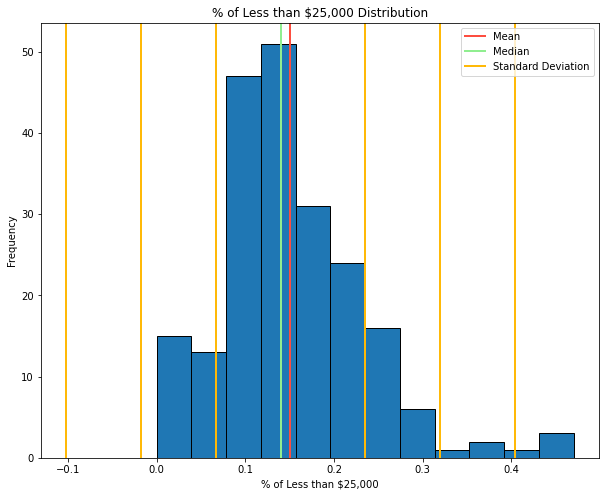

In [16]:
mean = np.mean(df2["Less than $25,000"])
median = np.median(df2["Less than $25,000"])
std = np.std(df2["Less than $25,000"])

plt.figure(figsize = (10,8))
plt.hist(df2["Less than $25,000"],bins=12, edgecolor='black')

plt.title("% of Less than $25,000 Distribution")
plt.xlabel("% of Less than $25,000")
plt.ylabel("Frequency")

plt.axvline(x = mean, color="#FD4E40", linestyle = "solid", linewidth=2, label="Mean")
plt.axvline(x = median, color="#90ee90", linestyle="solid", linewidth=2,label="Median")

plt.axvline(x = mean+std, color="#FFB908", linestyle = "solid", linewidth=2, label="Standard Deviation")
plt.axvline(x = mean-std, color="#FFB908", linestyle = "solid", linewidth=2)

plt.axvline(x = mean+std*2, color="#FFB908", linestyle = "solid", linewidth=2)
plt.axvline(x = mean-std*2, color="#FFB908", linestyle = "solid", linewidth=2)

plt.axvline(x = mean+std*3, color="#FFB908", linestyle = "solid", linewidth=2)
plt.axvline(x = mean-std*3, color="#FFB908", linestyle = "solid", linewidth=2)

plt.legend(loc=1)
plt.savefig("% of Less than $25,000 Distribution.png")
plt.show()

In [17]:
w1, w2, w3, w4,w5,w6,w7,w8,w9,w10=correlation['No health insurance coverage'][1:]+correlation['Less than $25,000'][1:]
w8=-w8
print(w1, w2, w3, w4,w5,w6,w7,w8,w9,w10)

1.448910641487508 1.0755463511989285 0.9645753075470636 0.5919578073471279 1.1652912267227837 1.1074287006595287 -0.07746284690658119 -1.448910641487508 1.0953870006472701 0.33057204745234803


In [18]:
w1= 0.2
w2= 0.1
w3= 0.01
w4= 0.05
w5= 0.02
w6= 0.1
w7= 0.05
w8= 0.02
w9= 0.4
w10= 0.05

df2['Weighted Mean'] = (df2['No health insurance coverage']*w1 + df2['Unemployed']*w2 + df2['No vehicles available']*w3
                        + df2['Child']*w4 + df1['Foreign born']*w5 +df2['Speak English less than "very well"']*w6 + 
                        df2['Without a broadband Internet subscription']*w7 + df2['Median age (years)']*w8 + 
                        df2['Less than $25,000']*w9 + df1['Less than 12th grade']*w10)/(w1+w2+w3+w4+w5+w6+w7+w8+w9+w10)

In [19]:
df2.head()

,Municipality,Year,No health insurance coverage,Unemployed,No vehicles available,Child,Foreign born,"Speak English less than ""very well""",Median age (years),"Less than $25,000",Less than 12th grade,Without a broadband Internet subscription,Weighted Mean
0,Bloomfield town,2020,0.13,0.04,0.01,0.32,0.11,0.07,34.9,0.23,0.15,0.20,0.8628
1,Bloomfield village,2020,0.07,0.04,0.02,0.39,0.03,0.02,35.9,0.19,0.15,0.19,0.8513
2,Burlington city,2020,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,0.0500
3,Darien town,2020,0.12,0.01,0.02,0.35,0.08,0.10,43.7,0.17,0.15,0.15,1.0113
4,Darien village,2020,0.07,0.05,0.00,0.31,0.05,0.02,36.7,0.08,0.07,0.15,0.8145


In [20]:
df3 = df2.sort_values(['Year','Weighted Mean'], ascending = (False, False))

In [21]:
df3[df3['Year']==2020].head(3)

,Municipality,Year,No health insurance coverage,Unemployed,No vehicles available,Child,Foreign born,"Speak English less than ""very well""",Median age (years),"Less than $25,000",Less than 12th grade,Without a broadband Internet subscription,Weighted Mean
10,Fontana-on-Geneva Lake village,2020,0.05,0.01,0.04,0.18,0.08,0.02,58.0,0.11,0.04,0.05,1.2325
20,Sharon town,2020,0.02,0.02,0.03,0.24,0.05,0.03,53.8,0.12,0.08,0.22,1.1613
6,Delavan town,2020,0.05,0.02,0.06,0.26,0.04,0.02,50.7,0.14,0.11,0.19,1.1134


In [22]:
df3[df3['Year']==2019].head(3)

,Municipality,Year,No health insurance coverage,Unemployed,No vehicles available,Child,Foreign born,"Speak English less than ""very well""",Median age (years),"Less than $25,000",Less than 12th grade,Without a broadband Internet subscription,Weighted Mean
40,Fontana-on-Geneva Lake village,2019,0.03,0.02,0.04,0.18,0.05,0.01,59.2,0.11,0.04,0.09,1.2539
50,Sharon town,2019,0.03,0.01,0.03,0.23,0.08,0.05,53.6,0.12,0.10,0.24,1.1624
36,Delavan town,2019,0.06,0.02,0.06,0.24,0.05,0.04,50.1,0.15,0.12,0.21,1.1101


In [23]:
df3[df3['Year']==2018].head(3)

,Municipality,Year,No health insurance coverage,Unemployed,No vehicles available,Child,Foreign born,"Speak English less than ""very well""",Median age (years),"Less than $25,000",Less than 12th grade,Without a broadband Internet subscription,Weighted Mean
70,Fontana-on-Geneva Lake village,2018,0.04,0.01,0.04,0.17,0.04,0.01,59.2,0.10,0.03,0.10,1.2502
80,Sharon town,2018,0.05,0.01,0.04,0.20,0.07,0.05,53.8,0.13,0.10,0.30,1.1758
84,Troy town,2018,0.05,0.03,0.02,0.21,0.02,0.01,51.7,0.16,0.05,0.16,1.1336


In [24]:
df3[df3['Year']==2017].head(3)

,Municipality,Year,No health insurance coverage,Unemployed,No vehicles available,Child,Foreign born,"Speak English less than ""very well""",Median age (years),"Less than $25,000",Less than 12th grade,Without a broadband Internet subscription,Weighted Mean
100,Fontana-on-Geneva Lake village,2017,0.04,0.01,0.03,0.19,0.03,0.01,58.5,0.11,0.04,0.11,1.2419
114,Troy town,2017,0.05,0.02,0.01,0.22,0.02,0.01,51.6,0.17,0.06,0.17,1.1360
110,Sharon town,2017,0.06,0.01,0.03,0.22,0.06,0.03,51.9,0.12,0.09,0.30,1.1340


In [25]:
df3[df3['Year']==2016].head(3)

,Municipality,Year,No health insurance coverage,Unemployed,No vehicles available,Child,Foreign born,"Speak English less than ""very well""",Median age (years),"Less than $25,000",Less than 12th grade,Without a broadband Internet subscription,Weighted Mean
130,Fontana-on-Geneva Lake village,2016,0.03,0.02,0.03,0.23,0.01,0.01,56.9,0.11,0.03,1.0,1.2545
140,Sharon town,2016,0.06,0.02,0.04,0.22,0.05,0.03,52.3,0.13,0.10,1.0,1.1824
127,East Troy town,2016,0.04,0.02,0.00,0.24,0.02,0.01,52.0,0.14,0.05,1.0,1.1719


In [26]:
df3[df3['Year']==2015].head(3)

,Municipality,Year,No health insurance coverage,Unemployed,No vehicles available,Child,Foreign born,"Speak English less than ""very well""",Median age (years),"Less than $25,000",Less than 12th grade,Without a broadband Internet subscription,Weighted Mean
160,Fontana-on-Geneva Lake village,2015,0.03,0.01,0.04,0.22,0.02,0.01,58.7,0.10,0.02,1.0,1.2848
157,East Troy town,2015,0.06,0.03,0.00,0.22,0.01,0.00,52.1,0.18,0.07,1.0,1.1937
170,Sharon town,2015,0.07,0.02,0.04,0.22,0.05,0.03,51.8,0.16,0.09,1.0,1.1859


In [27]:
df3[df3['Year']==2014].head(3)

,Municipality,Year,No health insurance coverage,Unemployed,No vehicles available,Child,Foreign born,"Speak English less than ""very well""",Median age (years),"Less than $25,000",Less than 12th grade,Without a broadband Internet subscription,Weighted Mean
190,Fontana-on-Geneva Lake village,2014,0.03,0.01,0.05,0.19,0.02,0.01,58.5,0.12,0.03,1.0,1.2879
196,Linn town,2014,0.08,0.07,0.03,0.24,0.07,0.02,51.7,0.19,0.08,1.0,1.2027
200,Sharon town,2014,0.09,0.03,0.02,0.24,0.04,0.02,50.1,0.13,0.07,1.0,1.1435


In [28]:
from sklearn.preprocessing import StandardScaler
df2[df2.columns[2:]]=StandardScaler().fit_transform(df2[df2.columns[2:]])

In [29]:
w1= 0.2
w2= 0.1
w3= 0.01
w4= 0.05
w5= 0.02
w6= 0.1
w7= 0.05
w8= 0.02
w9= 0.4
w10= 0.05

df2['Weighted Mean'] = (df2['No health insurance coverage']*w1 + df2['Unemployed']*w2 + df2['No vehicles available']*w3
                        + df2['Child']*w4 + df1['Foreign born']*w5 +df2['Speak English less than "very well"']*w6 + 
                        df2['Without a broadband Internet subscription']*w7 + df2['Median age (years)']*w8 + 
                        df2['Less than $25,000']*w9 + df1['Less than 12th grade']*w10)/(w1+w2+w3+w4+w5+w6+w7+w8+w9+w10)

In [30]:
df3 = df2.sort_values(['Year','Weighted Mean'], ascending = (False, False))

In [31]:
df3[df3['Year']==2020].head(3)

,Municipality,Year,No health insurance coverage,Unemployed,No vehicles available,Child,Foreign born,"Speak English less than ""very well""",Median age (years),"Less than $25,000",Less than 12th grade,Without a broadband Internet subscription,Weighted Mean
0,Bloomfield town,2020,1.400694,0.271914,-0.856618,0.692008,1.434535,0.972037,-0.555599,0.939467,1.333004,-0.815234,0.764181
27,Whitewater city,2020,-0.062718,-0.170737,0.896694,-1.174510,-0.083109,-0.422278,-1.711337,2.246010,-0.478195,-0.743261,0.709411
5,Delavan city,2020,0.912890,-0.170737,1.247357,-0.241251,1.181594,1.529763,-0.304741,0.820690,1.333004,-1.007161,0.600215


In [32]:
df3[df3['Year']==2019].head(3)

,Municipality,Year,No health insurance coverage,Unemployed,No vehicles available,Child,Foreign born,"Speak English less than ""very well""",Median age (years),"Less than $25,000",Less than 12th grade,Without a broadband Internet subscription,Weighted Mean
57,Whitewater city,2019,-0.062718,0.271914,1.948682,-1.574478,-0.336050,-0.422278,-1.720297,2.60234,-0.276950,-0.719270,0.888050
35,Delavan city,2019,1.156792,-0.170737,3.000669,0.158718,1.940416,2.366352,-0.448089,0.82069,2.137981,-0.839225,0.778316
51,Sharon village,2019,0.425086,0.714565,-0.155293,0.558686,1.181594,1.529763,-0.367456,0.82069,3.345446,-1.007161,0.620900


In [33]:
df3[df3['Year']==2018].head(3)

,Municipality,Year,No health insurance coverage,Unemployed,No vehicles available,Child,Foreign born,"Speak English less than ""very well""",Median age (years),"Less than $25,000",Less than 12th grade,Without a broadband Internet subscription,Weighted Mean
87,Whitewater city,2018,0.668988,0.271914,2.299344,-1.17451,0.169832,0.135448,-1.711337,2.839894,-0.075706,-0.719270,1.209769
65,Delavan city,2018,2.132400,-0.170737,2.650007,0.29204,2.699238,2.924078,-0.448089,0.820690,2.540469,-0.743261,1.038767
86,Walworth village,2018,0.912890,-0.613388,0.546032,0.29204,2.193357,1.529763,-0.215149,1.177020,0.729271,-0.599316,0.739617


In [34]:
df3[df3['Year']==2017].head(3)

,Municipality,Year,No health insurance coverage,Unemployed,No vehicles available,Child,Foreign born,"Speak English less than ""very well""",Median age (years),"Less than $25,000",Less than 12th grade,Without a broadband Internet subscription,Weighted Mean
117,Whitewater city,2017,0.668988,1.157216,2.650007,-1.174510,-0.083109,-0.143415,-1.711337,3.077447,0.125538,-0.671288,1.371640
95,Delavan city,2017,2.376302,0.271914,2.650007,0.292040,2.699238,3.202942,-0.394333,0.939467,2.540469,-0.695279,1.210684
116,Walworth village,2017,0.912890,0.714565,0.896694,0.158718,2.699238,1.808626,-0.582477,1.414574,0.729271,-0.479361,0.991212


In [35]:
df3[df3['Year']==2016].head(3)

,Municipality,Year,No health insurance coverage,Unemployed,No vehicles available,Child,Foreign born,"Speak English less than ""very well""",Median age (years),"Less than $25,000",Less than 12th grade,Without a broadband Internet subscription,Weighted Mean
147,Whitewater city,2016,0.668988,1.157216,2.650007,-0.907864,-0.083109,0.135448,-1.711337,3.433777,0.125538,1.104038,1.644157
125,Delavan city,2016,2.132400,0.714565,2.299344,0.425363,2.446297,2.924078,-0.528721,1.414574,2.540469,1.104038,1.458563
146,Walworth village,2016,0.912890,1.157216,0.896694,0.292040,2.699238,2.087489,-0.537681,1.652127,0.528027,1.104038,1.244617


In [36]:
df3[df3['Year']==2015].head(3)

,Municipality,Year,No health insurance coverage,Unemployed,No vehicles available,Child,Foreign born,"Speak English less than ""very well""",Median age (years),"Less than $25,000",Less than 12th grade,Without a broadband Internet subscription,Weighted Mean
177,Whitewater city,2015,0.668988,0.714565,2.650007,-0.907864,-0.083109,0.135448,-1.711337,3.790107,0.125538,1.104038,1.742424
155,Delavan city,2015,2.376302,1.599867,2.650007,0.425363,2.446297,2.645215,-0.555599,1.295797,2.540469,1.104038,1.523446
171,Sharon village,2015,1.156792,2.485169,0.546032,0.692008,0.169832,0.135448,-0.430170,1.889680,1.131759,1.104038,1.344151


In [37]:
df3[df3['Year']==2014].head(3)

,Municipality,Year,No health insurance coverage,Unemployed,No vehicles available,Child,Foreign born,"Speak English less than ""very well""",Median age (years),"Less than $25,000",Less than 12th grade,Without a broadband Internet subscription,Weighted Mean
207,Whitewater city,2014,0.912890,0.714565,2.650007,-0.507896,0.422772,0.414311,-1.675501,3.552554,0.528027,1.104038,1.746184
184,Darien village,2014,2.864106,3.813122,-1.207281,0.425363,1.181594,1.808626,-0.636232,1.295797,1.131759,1.104038,1.713987
195,Lake Geneva city,2014,2.132400,1.157216,1.948682,0.158718,1.687475,1.529763,-0.027006,1.177020,1.131759,1.104038,1.257470


In [38]:
df3.to_csv('walwortwheightedmean.csv', index = False)

In [39]:
df_temp=df3[['Municipality','Year','Weighted Mean']]

In [40]:
mapp={}
for place in df_temp['Municipality'].unique():
    mapp[place]=df_temp[df_temp['Municipality']==place]

In [41]:
mapp['Bloomfield town']

,Municipality,Year,Weighted Mean
0,Bloomfield town,2020,0.764181
30,Bloomfield town,2019,0.455744
60,Bloomfield town,2018,0.377060
90,Bloomfield town,2017,0.341210
120,Bloomfield town,2016,0.565975
150,Bloomfield town,2015,0.143461
180,Bloomfield town,2014,0.449401


In [42]:
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print('ADF : ',dftest[0])
     print('P-Value : ', dftest[1])
     print('Num Of Lags : ', dftest[2])
     print('Num Of Observations Used For ADF Regression:', dftest[3])
     print('Critical Values :')
     for key, val in dftest[4].items():
         print('\t',key, ': ', val)


In [43]:
#testing for seasonality p < 0.05 good otherwise bad
for place in mapp:
    print(place)
    ad_test(mapp[place]['Weighted Mean'])
    print('----')

Bloomfield town
ADF :  -3.6527322766251276
P-Value :  0.004829336066250606
Num Of Lags :  0
Num Of Observations Used For ADF Regression: 6
Critical Values :
	 1% :  -5.354256481481482
	 5% :  -3.6462381481481483
	 10% :  -2.901197777777778
----
Whitewater city
ADF :  -1.787956221717496
P-Value :  0.3864572760346951
Num Of Lags :  0
Num Of Observations Used For ADF Regression: 6
Critical Values :
	 1% :  -5.354256481481482
	 5% :  -3.6462381481481483
	 10% :  -2.901197777777778
----
Delavan city
ADF :  -1.716460509827499
P-Value :  0.4226521037889102
Num Of Lags :  1
Num Of Observations Used For ADF Regression: 5
Critical Values :
	 1% :  -6.045114
	 5% :  -3.9292800000000003
	 10% :  -2.98681
----
Darien town
ADF :  -11.527734493481226
P-Value :  3.898954677903138e-21
Num Of Lags :  1
Num Of Observations Used For ADF Regression: 5
Critical Values :
	 1% :  -6.045114
	 5% :  -3.9292800000000003
	 10% :  -2.98681
----
Walworth village
ADF :  -1.1337312086326536
P-Value :  0.7014346061309

<AxesSubplot:ylabel='Density'>

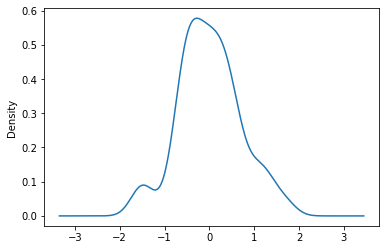

In [44]:
df_mean = df3['Weighted Mean']
df_mean.plot(kind='kde')

In [46]:
# log transformation to remove seasonality
df_log = df3['Weighted Mean']
df_log = np.log(df_log)
df_log

/Users/thapas/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0     -0.268950
27    -0.343321
5     -0.510468
3     -0.882189
26    -1.086708
         ...   
198         NaN
187         NaN
190         NaN
208         NaN
182         NaN
Name: Weighted Mean, Length: 210, dtype: float64

In [85]:
df_temp=df3[['Municipality','Year','Weighted Mean']]

In [48]:
from sklearn.metrics import mean_squared_error

In [50]:
muns=['Bloomfield town', 'Whitewater city', 'Delavan city',
       'Darien town', 'Walworth village', 'Sharon village',
       'Lake Geneva city', 'Bloomfield village', 'Elkhorn city',
       'Walworth town', 'Linn town', 'Williams Bay village',
       'Genoa City village', 'Delavan town', 'Geneva town',
       'Darien village', 'Richmond town', 'Sharon town',
       'Fontana-on-Geneva Lake village', 'Whitewater town',
       'East Troy village', 'Spring Prairie town', 'East Troy town',
       'Troy town', 'La Grange town', 'Lyons town', 'Lafayette town',
       'Sugar Creek town', 'Mukwonago village', 'Burlington city']
#for municipality in muns:
len(muns)

30

In [74]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 182
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Municipality   210 non-null    object 
 1   Year           210 non-null    int64  
 2   Weighted Mean  210 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.6+ KB


In [75]:
def ARIMA(df):
    x=df.sort_values('Year')['Weighted Mean']
    model = sm.tsa.arima.ARIMA(x.to_numpy(), order=(0,0,0))
    model_fit = model.fit(x)
    output=model_fit.forecast()
    return output

In [76]:
df_temp[df['Municipality']==muns[22]]

/var/folders/ks/_4kbz9rs6nb4xf_z5_30rv8c0000gn/T/ipykernel_69213/3677726250.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp[df['Municipality']==muns[22]]


,Municipality,Year,Weighted Mean
7,East Troy town,2020,-0.634924
37,East Troy town,2019,-0.485620
67,East Troy town,2018,-0.637261
97,East Troy town,2017,-0.336698
127,East Troy town,2016,-0.295318
157,East Troy town,2015,-0.003689
187,East Troy town,2014,-0.387897


In [54]:
ARIMA(df_temp[df['Municipality']==muns[24]])

[nan]


/var/folders/ks/_4kbz9rs6nb4xf_z5_30rv8c0000gn/T/ipykernel_69213/1647160121.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ARIMA(df_temp[df['Municipality']==muns[24]])
/Users/thapas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1485: RuntimeWarning: invalid value encountered in double_scalars
  unconstrained[start] = constrained[start]**0.5
/Users/thapas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
for x in muns:
    [output]=ARIMA(df_temp[df_temp['Municipality']==x])
    row={'Municipality':x,'Year':2021,'Weighted Mean':output}
    print(row)
    df_temp=df_temp.append(row,ignore_index=True)

{'Municipality': 'Bloomfield town', 'Year': 2021, 'Weighted Mean': 0.4424280706103042}
{'Municipality': 'Whitewater city', 'Year': 2021, 'Weighted Mean': 1.330228623965953}
{'Municipality': 'Delavan city', 'Year': 2021, 'Weighted Mean': 1.1205464091358748}
{'Municipality': 'Darien town', 'Year': 2021, 'Weighted Mean': 0.39077804245990316}
{'Municipality': 'Walworth village', 'Year': 2021, 'Weighted Mean': 0.8328829222196055}
{'Municipality': 'Sharon village', 'Year': 2021, 'Weighted Mean': 0.8130188743203803}
{'Municipality': 'Lake Geneva city', 'Year': 2021, 'Weighted Mean': 0.7308908746924253}
{'Municipality': 'Bloomfield village', 'Year': 2021, 'Weighted Mean': 0.41059469472029536}
{'Municipality': 'Elkhorn city', 'Year': 2021, 'Weighted Mean': 0.30413994976610076}
{'Municipality': 'Walworth town', 'Year': 2021, 'Weighted Mean': 0.16816144365269808}
{'Municipality': 'Linn town', 'Year': 2021, 'Weighted Mean': 0.24852722292485713}
{'Municipality': 'Williams Bay village', 'Year': 2021

/Users/thapas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1485: RuntimeWarning: invalid value encountered in double_scalars
  unconstrained[start] = constrained[start]**0.5
/Users/thapas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/thapas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/thapas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/thapas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/mode

{'Municipality': 'Spring Prairie town', 'Year': 2021, 'Weighted Mean': nan}
{'Municipality': 'East Troy town', 'Year': 2021, 'Weighted Mean': nan}
{'Municipality': 'Troy town', 'Year': 2021, 'Weighted Mean': nan}
{'Municipality': 'La Grange town', 'Year': 2021, 'Weighted Mean': nan}
{'Municipality': 'Lyons town', 'Year': 2021, 'Weighted Mean': -0.37277484649328174}
{'Municipality': 'Lafayette town', 'Year': 2021, 'Weighted Mean': nan}
{'Municipality': 'Sugar Creek town', 'Year': 2021, 'Weighted Mean': nan}
{'Municipality': 'Mukwonago village', 'Year': 2021, 'Weighted Mean': nan}
{'Municipality': 'Burlington city', 'Year': 2021, 'Weighted Mean': nan}


/Users/thapas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/thapas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/thapas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/thapas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [88]:
df_temp[df_temp['Municipality']==muns[0]]

,Municipality,Year,Weighted Mean
0,Bloomfield town,2020,0.764181
33,Bloomfield town,2019,0.455744
65,Bloomfield town,2018,0.377060
99,Bloomfield town,2017,0.341210
127,Bloomfield town,2016,0.565975
165,Bloomfield town,2015,0.143461
190,Bloomfield town,2014,0.449401
210,Bloomfield town,2021,0.442428


In [ ]:
ARIMA(df_temp[df['Municipality']==muns[10]])

In [ ]:
#recreate the ARIMA model after each new observation as we have limited number of obs
#will most likely overfit 
train_data, test_data = df_temp[0:int(len(df_temp)*0.7)], df_temp[int(len(df_temp)*0.7):]
training_data = train_data['Weighted Mean'].values
test_data = test_data['Weighted Mean'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = sm.tsa.arima.ARIMA(history, order=(0,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)

In [101]:
def plot_graph(mun):
    global df_temp
    ddf=df_temp[df_temp['Municipality']==mun].sort_values('Year')
    fig, ax = plt.subplots()
    ax.plot(ddf['Year'], ddf['Weighted Mean'])
    #ax.set_xlabel(ddf['Year'])
    return fig

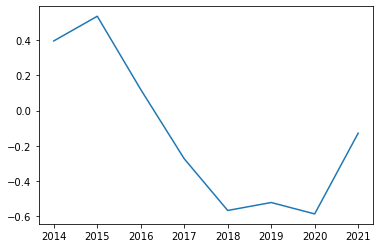

In [113]:
fig1=plot_graph(muns[20])

In [56]:
# viz to track performance
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Value')
plt.plot(test_set_range, test_data, color='red', label='Actual Value')
plt.title('Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

NameError: name 'model_predictions' is not defined